In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 2000)

In [108]:
df = pd.read_csv(r'finviz_4_19_2020.csv')

In [109]:
df.columns

Index(['No.', 'Ticker', 'Company', 'Sector', 'Industry', 'Country',
       'Market Cap', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'P/Cash',
       'P/Free Cash Flow', 'Dividend Yield', 'Payout Ratio', 'EPS (ttm)',
       'EPS growth this year', 'EPS growth next year',
       'EPS growth past 5 years', 'EPS growth next 5 years',
       'Sales growth past 5 years', 'EPS growth quarter over quarter',
       'Sales growth quarter over quarter', 'Shares Outstanding',
       'Shares Float', 'Insider Ownership', 'Insider Transactions',
       'Institutional Ownership', 'Institutional Transactions', 'Float Short',
       'Short Ratio', 'Return on Assets', 'Return on Equity',
       'Return on Investment', 'Current Ratio', 'Quick Ratio',
       'LT Debt/Equity', 'Total Debt/Equity', 'Gross Margin',
       'Operating Margin', 'Profit Margin', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',

In [110]:
df.shape

(7673, 71)

In [111]:
df['Sector'].unique()

array(['Healthcare', 'Basic Materials', 'Financial', 'Services',
       'Technology', 'Industrial Goods', 'Consumer Goods',
       'Conglomerates', 'Utilities'], dtype=object)

In [112]:
df = df[df['Sector'] != 'Conglomerates']

In [113]:
df = df[df['Industry'] != 'Exchange Traded Fund']

In [114]:
df = df[df['Industry'] != 'Closed-End Fund - Debt']

In [115]:
df = df[df['Industry'] != 'Closed-End Fund - Equity']

In [116]:
df = df[df['Industry'] != 'Asset Management']

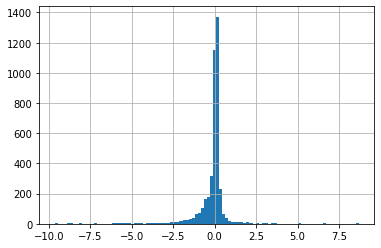

In [117]:
df['ROE'] = df['Return on Equity'].apply(lambda x: float(str(x).strip('%'))/100)
df['ROE'].hist(bins=100)

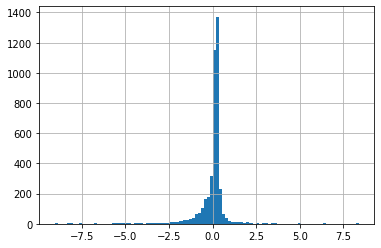

In [118]:
df['zROE'] = (df['ROE'] - df['ROE'].mean())/df['ROE'].std()
df['zROE'].hist(bins=100)

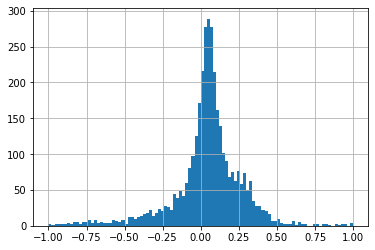

In [119]:
df['PM'] = df['Profit Margin'].apply(lambda x: float(str(x).strip('%'))/100)
df['PM'].hist(bins=100)

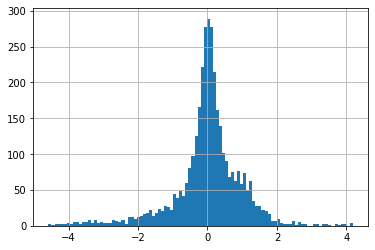

In [120]:
df['zPM'] = (df['PM'] - df['PM'].mean())/df['PM'].std()
df['zPM'].hist(bins=100)

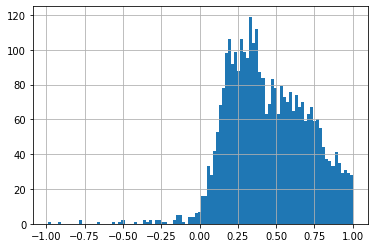

In [121]:
df['GM'] = df['Gross Margin'].apply(lambda x: float(str(x).strip('%'))/100)
df['GM'].hist(bins=100)

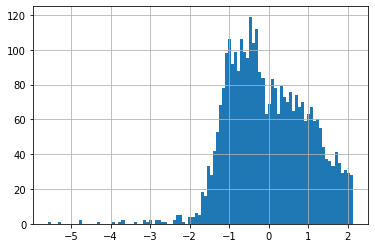

In [122]:
df['zGM'] = (df['GM'] - df['GM'].mean())/df['GM'].std()
df['zGM'].hist(bins=100)

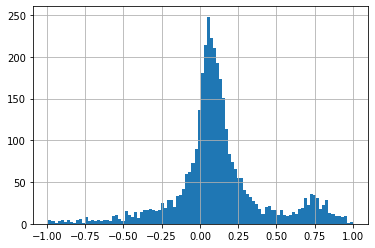

In [123]:
df['OM'] = df['Operating Margin'].apply(lambda x: float(str(x).strip('%'))/100)
df['OM'].hist(bins=100)

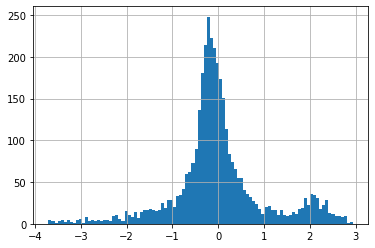

In [124]:
df['zOM'] = (df['OM'] - df['OM'].mean())/df['OM'].std()
df['zOM'].hist(bins=100)

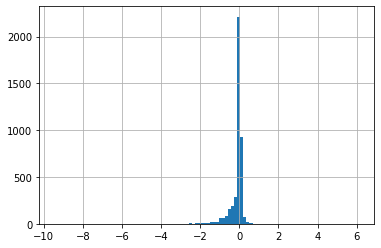

In [125]:
df['ROA'] = df['Return on Assets'].apply(lambda x: float(str(x).strip('%'))/100)
df['ROA'].hist(bins=100)

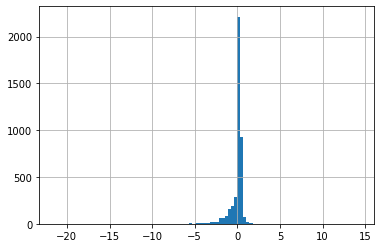

In [126]:
df['zROA'] = (df['ROA'] - df['ROA'].mean())/df['ROA'].std()
df['zROA'].hist(bins=100)

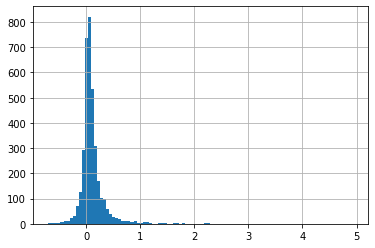

In [127]:
df['SG'] = df['Sales growth past 5 years'].apply(lambda x: float(str(x).strip('%'))/100)
df['SG'].hist(bins=100)

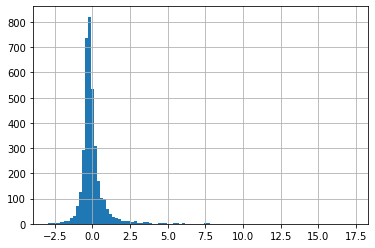

In [128]:
df['zSG'] = (df['SG'] - df['SG'].mean())/df['SG'].std()
df['zSG'].hist(bins=100)

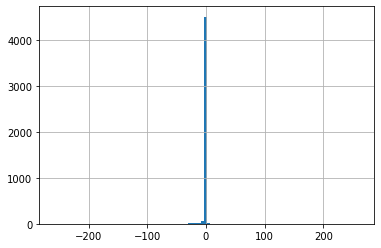

In [129]:
df['HEP'] = df['EPS (ttm)'] / df['Price']
df['HEP'].hist(bins=100)

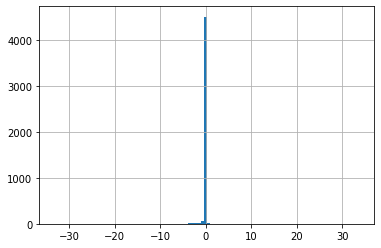

In [130]:
df['zHEP'] = (df['HEP'] - df['HEP'].mean())/df['HEP'].std()
df['zHEP'].hist(bins=100)

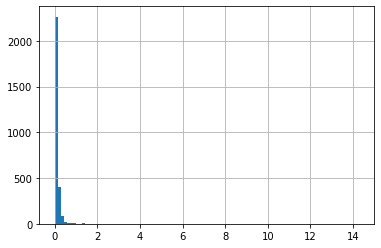

In [131]:
df['FEP'] = 1 / df['Forward P/E']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['FEP'].hist(bins=100)

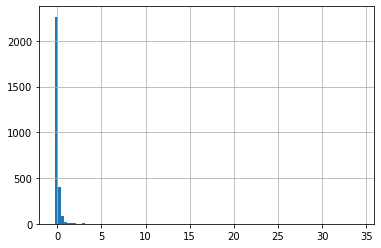

In [132]:
df['zFEP'] = (df['FEP'] - df['FEP'].mean())/df['FEP'].std()
df['zFEP'].hist(bins=100)

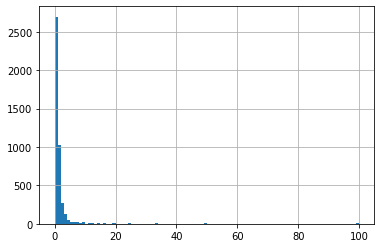

In [133]:
df['BP'] = 1 / df['P/B']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['BP'].hist(bins=100)

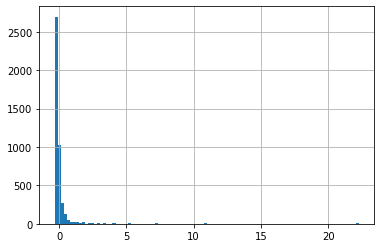

In [134]:
df['zBP'] = (df['BP'] - df['BP'].mean())/df['BP'].std()
df['zBP'].hist(bins=100)

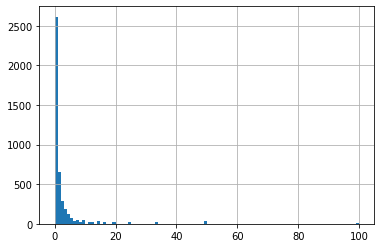

In [135]:
df['SP'] = 1 / df['P/S']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['SP'].hist(bins=100)

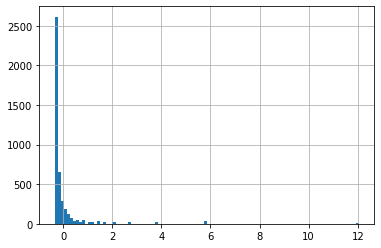

In [136]:
df['zSP'] = (df['SP'] - df['SP'].mean())/df['SP'].std()
df['zSP'].hist(bins=100)

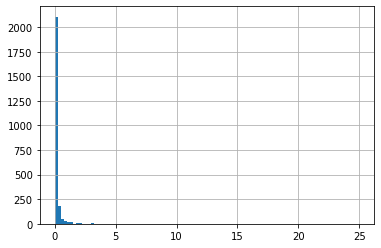

In [137]:
df['CFP'] = 1 / df['P/Free Cash Flow']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['CFP'].hist(bins=100)

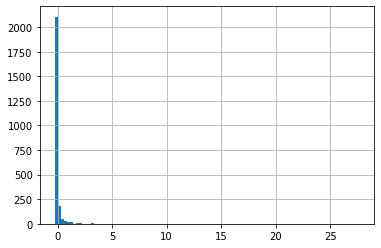

In [138]:
df['zCFP'] = (df['CFP'] - df['CFP'].mean())/df['CFP'].std()
df['zCFP'].hist(bins=100)

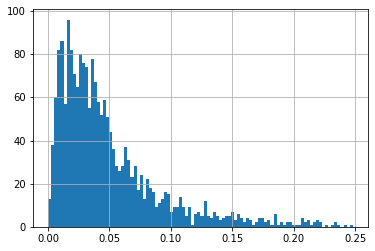

In [139]:
df['DP'] = df['Dividend Yield'].apply(lambda x: float(str(x).strip('%'))/100)
df[df['DP'] < 0.25]['DP'].hist(bins=100)

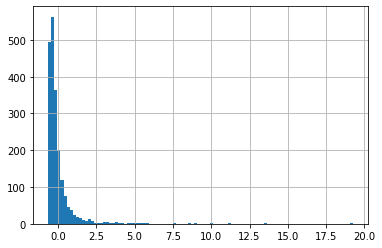

In [140]:
df['zDP'] = (df['DP'] - df['DP'].mean())/df['DP'].std()
df['zDP'].hist(bins=100)

In [141]:
df['zQuality'] = df[['zROE', 'zPM', 'zROA', 'zGM', 'zOM', 'zSG']].mean(axis=1)

In [142]:
df['zValue'] = df[['zHEP', 'zFEP', 'zBP', 'zSP', 'zCFP', 'zDP']].mean(axis=1)

In [143]:
df[df['zQuality'].isnull()].shape

(366, 97)

In [144]:
df[df['zValue'].isnull()].shape

(28, 97)

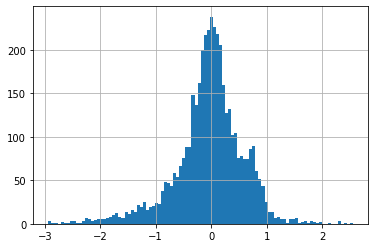

In [145]:
df[(df['zQuality'] < 3) & (df['zQuality'] > -3)]['zQuality'].hist(bins=100)

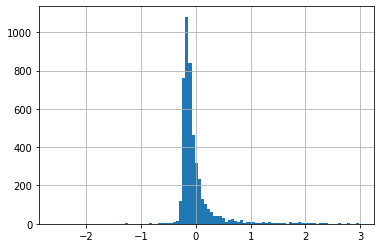

In [146]:
df[(df['zValue'] < 3) & (df['zValue'] > -3)]['zValue'].hist(bins=100)

In [147]:
df[df['zQuality'] > 1].sort_values(by=['zQuality'], ascending=False).shape

(107, 97)

In [148]:
df['pctRankQuality'] = df['zQuality'].rank(pct=True)
df['pctRankValue'] = df['zValue'].rank(pct=True)

In [149]:
df[df['pctRankValue'] > 0.75].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
7619,7620,YRD,Yiren Digital Ltd.,Financial,Credit Services,China,348.83,2.14,2.47,NaN,...,3.448276,0.087566,NaN,NaN,NaN,NaN,8.247403,0.209709,1.000000,0.883537
5191,5192,PBT,Permian Basin Royalty Trust,Basic Materials,Independent Oil & Gas,USA,148.74,7.36,NaN,0.74,...,0.137741,-0.322637,NaN,NaN,0.1336,0.738309,5.004713,0.044292,0.999538,0.793620
4557,4558,MSB,Mesabi Trust,Financial,Diversified Investments,USA,168.46,5.60,NaN,NaN,...,0.190114,-0.316147,NaN,NaN,0.1745,1.158524,2.303822,0.156086,0.998154,0.864483
5613,5614,QD,Qudian Inc.,Technology,Information Technology Services,China,431.11,1.08,2.01,NaN,...,2.941176,0.024732,NaN,NaN,NaN,NaN,2.153941,0.423498,0.997461,0.928281
851,852,BPT,BP Prudhoe Bay Royalty Trust,Basic Materials,Oil & Gas Refining & Marketing,USA,99.51,2.08,NaN,NaN,...,0.492611,-0.278665,0.002010,-0.248235,0.2817,2.259919,1.873115,0.308036,0.996307,0.909227
4255,4256,LXRX,"Lexicon Pharmaceuticals, Inc.",Healthcare,Biotechnology,USA,203.13,1.82,NaN,NaN,...,1.587302,-0.143024,0.558659,0.373079,NaN,NaN,1.826450,0.044191,0.996077,0.793406
4625,4626,MVO,MV Oil Trust,Basic Materials,Independent Oil & Gas,USA,39.94,3.00,NaN,0.43,...,0.325733,-0.299343,NaN,NaN,0.2921,2.366771,1.751645,0.482947,0.995384,0.936416
4682,4683,NBLX,Noble Midstream Partners LP,Basic Materials,Oil & Gas Pipelines,USA,403.11,1.25,1.94,NaN,...,1.754386,-0.122321,0.017117,-0.231372,0.1812,1.227361,1.724322,0.391798,0.995153,0.922501
6209,6210,SJT,San Juan Basin Royalty Trust,Basic Materials,Independent Oil & Gas,USA,104.68,12.07,NaN,NaN,...,0.094607,-0.327981,NaN,NaN,0.1857,1.273595,1.717472,0.178025,0.994923,0.872404
5480,5481,PRT,PermRock Royalty Trust,Basic Materials,Oil & Gas Equipment & Services,USA,33.74,3.16,13.53,0.63,...,0.308642,-0.301461,NaN,NaN,0.2826,2.269166,1.648250,0.472320,0.994461,0.935346


In [177]:
df[df['Ticker'] == 'CCL'][['zHEP', 'zFEP', 'zSP', 'zBP', 'zCFP', 'zDP', 'zQuality', 'zValue']]

,zHEP,zFEP,zSP,zBP,zCFP,zDP,zQuality,zValue
1074,0.101979,0.074233,-0.070338,0.315146,NaN,NaN,0.053285,0.105255


In [180]:
df[df['Ticker'] == 'RCL']

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
5709,5710,RCL,Royal Caribbean Cruises Ltd.,Services,Resorts & Casinos,USA,8496.88,4.18,5.45,NaN,...,1.282051,-0.180847,0.010474,-0.238787,0.0834,0.222543,0.215177,0.012491,0.697438,0.758724


In [151]:
df[(df['Industry'] == 'REIT - Retail') & (df['pctRankValue'] > 0.75)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
6355,6356,SPG,"Simon Property Group, Inc.",Financial,REIT - Retail,USA,19774.44,8.24,7.45,0.96,...,0.290698,-0.303684,0.018857,-0.229430,0.1497,0.903723,0.837090,0.031285,0.945303,0.778634
2135,2136,EPR,EPR Properties,Financial,REIT - Retail,USA,1888.48,14.47,8.51,2.07,...,0.344828,-0.296977,NaN,NaN,0.1867,1.283869,0.745731,0.216675,0.915532,0.886106
3954,3955,KIM,Kimco Realty Corporation,Financial,REIT - Retail,USA,4417.63,11.15,11.57,2.42,...,0.262467,-0.307182,0.023111,-0.224683,0.1256,0.656115,0.505344,0.013849,0.838449,0.759794
5890,5891,RPT,RPT Realty,Financial,REIT - Retail,USA,513.32,6.81,69.38,NaN,...,0.456621,-0.283125,0.037202,-0.208954,0.1586,0.995164,0.483566,0.063141,0.829910,0.809249
7401,7402,WHLR,"Wheeler Real Estate Investment Trust, Inc.",Financial,REIT - Retail,USA,11.68,NaN,NaN,NaN,...,5.555556,0.348675,1.315789,1.218163,NaN,NaN,0.395808,0.463261,0.793676,0.933633
6214,6215,SKT,"Tanger Factory Outlet Centers, Inc.",Financial,REIT - Retail,USA,621.70,6.14,10.71,0.92,...,0.769231,-0.244390,0.139276,-0.095023,0.2509,1.943473,0.349951,0.247050,0.773829,0.895097
6196,6197,SITC,SITE Centers Corp.,Financial,REIT - Retail,USA,1262.65,17.30,30.00,NaN,...,0.401606,-0.289941,0.011008,-0.238191,0.1389,0.792762,0.249658,0.024232,0.718671,0.770285
4011,4012,KRG,Kite Realty Group Trust,Financial,REIT - Retail,USA,790.08,NaN,124.56,NaN,...,0.398406,-0.290338,NaN,NaN,0.1499,0.905778,0.203950,0.098174,0.688438,0.836009
5884,5885,RPAI,"Retail Properties of America, Inc.",Financial,REIT - Retail,USA,1224.42,34.40,18.30,NaN,...,0.393701,-0.290921,0.049407,-0.195332,0.1279,0.679746,0.194226,0.018610,0.681745,0.764290
1101,1102,CDR,"Cedar Realty Trust, Inc.",Financial,REIT - Retail,USA,77.62,28.18,NaN,2.56,...,1.851852,-0.110244,NaN,NaN,0.0473,-0.148356,0.021125,0.141557,0.520886,0.857846


In [152]:
df[(df['Industry'] == 'REIT - Diversified') & (df['pctRankValue'] > 0.75)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
5030,5031,OLP,"One Liberty Properties, Inc.",Financial,REIT - Diversified,USA,307.39,16.58,NaN,2.76,...,0.275482,-0.305569,NaN,NaN,0.1240,0.639676,0.610026,0.080168,0.872144,0.823806
2936,2937,GNL,"Global Net Lease, Inc.",Financial,REIT - Diversified,USA,1242.08,32.75,58.50,NaN,...,0.246305,-0.309185,NaN,NaN,0.1243,0.642758,0.531208,0.031263,0.846296,0.777778
129,130,AFIN,"American Finance Trust, Inc.",Financial,REIT - Diversified,USA,747.59,NaN,NaN,NaN,...,0.401606,-0.289941,NaN,NaN,0.1250,0.649950,0.254200,0.157155,0.721440,0.864911
3607,3608,IOR,"Income Opportunity Realty Investors, Inc.",Financial,REIT - Diversified,USA,41.80,10.07,NaN,NaN,...,NaN,NaN,0.098039,-0.141050,NaN,NaN,0.243622,0.051138,0.714747,0.798330
6304,6305,SNR,New Senior Investment Group Inc.,Financial,REIT - Diversified,USA,258.35,36.75,NaN,NaN,...,1.333333,-0.174493,0.044903,-0.200359,0.1837,1.253046,0.159919,0.171157,0.652666,0.870049
1579,1580,CXW,"CoreCivic, Inc.",Financial,REIT - Diversified,USA,1462.22,7.34,7.81,1.22,...,1.351351,-0.172260,0.059988,-0.183522,0.1512,0.919135,-0.003550,0.093143,0.498731,0.832798
6437,6438,SRG,Seritage Growth Properties,Financial,REIT - Diversified,USA,430.64,NaN,NaN,NaN,...,0.392157,-0.291112,NaN,NaN,0.1005,0.398232,-0.398428,0.069963,0.210478,0.815671
1272,1273,CLNY,"Colony Capital, Inc.",Financial,REIT - Diversified,USA,1097.56,NaN,NaN,NaN,...,2.127660,-0.076069,NaN,NaN,0.2126,1.549971,-0.574215,0.487271,0.153012,0.936630
130,131,AFINP,"American Finance Trust, Inc.",Financial,REIT - Diversified,USA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0950,0.341724,NaN,0.087589,NaN,0.829373
2479,2480,FISK,"Empire State Realty OP, L.P.",Financial,REIT - Diversified,USA,34.80,23.51,NaN,NaN,...,20.000000,2.138462,NaN,NaN,0.0455,-0.166849,NaN,0.469869,NaN,0.935132


In [153]:
df[(df['Industry'] == 'REIT - Hotel/Motel') & (df['pctRankValue'] > 0.75)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
355,356,APLE,"Apple Hospitality REIT, Inc.",Financial,REIT - Hotel/Motel,USA,1918.11,10.73,14.98,NaN,...,0.662252,-0.257645,0.019865,-0.228306,0.1456,0.861599,0.239764,0.066277,0.711747,0.812246
720,721,BHR,"Braemar Hotels & Resorts, Inc.",Financial,REIT - Hotel/Motel,USA,90.92,NaN,8.13,NaN,...,5.263158,0.312445,NaN,NaN,NaN,NaN,0.164568,0.266511,0.655897,0.899807
5802,5803,RHP,"Ryman Hospitality Properties, Inc.",Financial,REIT - Hotel/Motel,USA,1593.43,9.98,10.78,0.64,...,1.010101,-0.214544,0.011861,-0.237239,0.1360,0.762967,0.089095,0.015498,0.587814,0.761293
6537,6538,SVC,Service Properties Trust,Financial,REIT - Hotel/Motel,USA,1042.81,3.71,NaN,0.74,...,2.222222,-0.064352,0.108932,-0.128891,0.2777,2.218822,0.086356,0.479733,0.586430,0.935988
6314,6315,SOHO,Sotherly Hotels Inc.,Financial,REIT - Hotel/Motel,USA,28.94,NaN,NaN,NaN,...,6.250000,0.434723,0.286533,0.069340,0.2667,2.105806,0.076702,0.638917,0.578352,0.948191
5829,5830,RLJ,RLJ Lodging Trust,Financial,REIT - Hotel/Motel,USA,1412.83,12.80,15.26,NaN,...,1.111111,-0.202028,0.168919,-0.061937,0.1214,0.612963,0.032640,0.070621,0.534964,0.816742
3270,3271,HT,Hersha Hospitality Trust,Financial,REIT - Hotel/Motel,USA,206.57,NaN,NaN,NaN,...,2.564103,-0.021990,0.285714,0.068427,0.2231,1.657850,-0.162572,0.474287,0.355643,0.935560
1100,1101,CDOR,"Condor Hospitality Trust, Inc.",Financial,REIT - Hotel/Motel,USA,44.52,NaN,NaN,NaN,...,1.369863,-0.169966,0.175131,-0.055002,0.2173,1.598260,-0.180167,0.310318,0.337180,0.909869
177,178,AHT,"Ashford Hospitality Trust, Inc.",Financial,REIT - Hotel/Motel,USA,78.49,NaN,NaN,NaN,...,20.000000,2.138462,NaN,NaN,0.3460,2.920551,-0.238611,1.344254,0.297254,0.976022
1405,1406,CPLG,CorePoint Lodging Inc.,Financial,REIT - Hotel/Motel,USA,191.07,NaN,NaN,NaN,...,4.166667,0.176581,NaN,NaN,0.2500,1.934227,-0.790176,0.758374,0.107085,0.956754


In [154]:
df[(df['Industry'] == 'REIT - Residential') & (df['pctRankValue'] > 0.75)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
369,370,APTS,"Preferred Apartment Communities, Inc.",Financial,REIT - Residential,USA,331.22,NaN,NaN,NaN,...,1.428571,-0.162692,0.157233,-0.074980,0.1498,0.904751,0.333420,0.338122,0.762289,0.915007
864,865,BRG,"Bluerock Residential Growth REIT, Inc.",Financial,REIT - Residential,USA,144.31,NaN,NaN,NaN,...,1.449275,-0.160127,0.187266,-0.041458,0.1102,0.497892,0.238843,0.023972,0.710593,0.769642


In [155]:
df[(df['Industry'] == 'REIT - Office') & (df['pctRankValue'] < 0.25)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
1658,1659,DEA,"Easterly Government Properties, Inc.",Financial,REIT - Office,USA,1976.78,268.51,135.60,NaN,...,0.112108,-0.325813,0.026911,-0.220442,0.0383,-0.240824,0.773373,-0.200698,0.926841,0.143652
398,399,ARE,"Alexandria Real Estate Equities, Inc.",Financial,REIT - Office,USA,19592.36,50.15,50.85,501.49,...,0.078186,-0.330016,NaN,NaN,0.0265,-0.362059,0.474148,-0.216802,0.827141,0.088418
1378,1379,COR,CoreSite Realty Corporation,Financial,REIT - Office,USA,4483.80,58.09,61.82,3.89,...,0.127714,-0.323879,0.005286,-0.244579,0.0409,-0.214111,0.451526,-0.214724,0.818371,0.092700
4008,4009,KRC,Kilroy Realty Corporation,Financial,REIT - Office,USA,7582.04,34.71,31.50,4.34,...,0.110497,-0.326012,0.005605,-0.244222,0.0302,-0.324045,0.450115,-0.204460,0.817909,0.129523
974,975,BXP,"Boston Properties, Inc.",Financial,REIT - Office,USA,15716.44,28.95,24.47,4.14,...,0.188324,-0.316369,0.023283,-0.224491,0.0410,-0.213083,0.371618,-0.186974,0.784445,0.212160
1754,1755,DLR,"Digital Realty Trust, Inc.",Financial,REIT - Office,USA,38398.11,63.49,98.22,3.81,...,0.083542,-0.329352,0.014945,-0.233797,0.0300,-0.326100,0.333500,-0.226069,0.762520,0.065939
5526,5527,PSTL,"Postal Realty Trust, Inc.",Financial,REIT - Office,USA,114.53,NaN,NaN,NaN,...,0.098717,-0.327472,NaN,NaN,0.0242,-0.385690,0.059934,-0.207996,0.561274,0.116035


In [156]:
df[(df['Industry'] == 'Mortgage Investment') & (df['pctRankValue'] > 0.75)].sort_values(by=['pctRankQuality'], ascending=False)

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
5974,5975,SACH,Sachem Capital Corp.,Financial,Mortgage Investment,USA,46.19,6.89,7.29,NaN,...,0.272480,-0.305941,NaN,NaN,0.2124,1.547916,1.068949,0.273885,0.980383,0.902162
4181,4182,LOAN,"Manhattan Bridge Capital, Inc.",Financial,Mortgage Investment,USA,37.19,8.43,8.70,NaN,...,0.196464,-0.315360,NaN,NaN,0.1137,0.533852,1.014522,0.030912,0.977152,0.777136
6841,6842,TRTX,"TPG RE Finance Trust, Inc.",Financial,Mortgage Investment,USA,525.66,3.92,3.72,0.78,...,0.649351,-0.259244,0.227790,0.003774,0.2544,1.979433,0.896972,0.422681,0.959612,0.927639
403,404,ARI,"Apollo Commercial Real Estate Finance, Inc.",Financial,Mortgage Investment,USA,1334.28,6.15,5.53,86.61,...,0.364964,-0.294482,0.003148,-0.246965,0.1923,1.341405,0.879088,0.193975,0.955920,0.877114
205,206,AJX,Great Ajax Corp.,Financial,Mortgage Investment,USA,195.67,6.66,6.89,NaN,...,0.636943,-0.260781,NaN,NaN,0.1622,1.032151,0.698987,0.211420,0.899146,0.884393
4363,4364,MFA,"MFA Financial, Inc.",Financial,Mortgage Investment,USA,863.41,2.28,2.73,0.39,...,0.934579,-0.223902,NaN,NaN,0.4494,3.982904,0.652905,1.017386,0.883914,0.967887
972,973,BXMT,"Blackstone Mortgage Trust, Inc.",Financial,Mortgage Investment,USA,3095.78,9.21,8.66,NaN,...,0.284900,-0.304402,NaN,NaN,0.1144,0.541044,0.599570,0.052846,0.868913,0.800471
30,31,ABR,"Arbor Realty Trust, Inc.",Financial,Mortgage Investment,USA,773.61,5.34,5.32,0.67,...,0.694444,-0.253656,NaN,NaN,0.1775,1.189346,0.566067,0.243504,0.857374,0.893813
4431,4432,MITT,"AG Mortgage Investment Trust, Inc.",Financial,Mortgage Investment,USA,109.55,1.22,3.43,NaN,...,1.562500,-0.146097,NaN,NaN,0.5806,5.330880,0.534555,1.339119,0.848373,0.975808
4539,4540,MRCC,Monroe Capital Corporation,Financial,Mortgage Investment,USA,146.19,7.55,5.19,1.51,...,0.467290,-0.281803,NaN,NaN,0.1972,1.391748,0.461019,0.285389,0.823448,0.904731


In [157]:
df[df['Ticker'] == 'QFIN']

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Forward P/E,PEG,...,SP,zSP,CFP,zCFP,DP,zDP,zQuality,zValue,pctRankQuality,pctRankValue
5624,5625,QFIN,"360 Finance, Inc.",Financial,Credit Services,China,1099.93,3.29,2.16,NaN,...,1.190476,-0.192194,NaN,NaN,NaN,NaN,0.85733,0.153277,0.950381,0.862342
